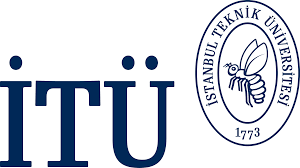


# GEO468E | Special Topics in Remote Sensing                

## Jupyter Notebook Tutorial   + NDVI Calculation & Visualization

* 23/11/2020     

***


## [Follow CSCRS on Twitter!](https://twitter.com/uhuzam "CSCRS")


## [Follow CSCRS on Instagram!](https://www.instagram.com/uhuzam/ "CSCRS")

# Markdown types

## Fonts
* This sentence shows _italic_ font type.
* This **sentence** shows __bold__ font type.

# Ordered Lists 

### Programming Languages 
* C
- C#
* C++ etc.

# Bullet Lists

### Computer Vision based Remote Sensing applications
1. LCLU Classification
    1. Pixel based classification
    2. Patch based cls.
    3. Object Based cls. (GEOBIA)
2. Object Detection
    1. Plane Detection
    2. Ship Detection 
3. Change Detection
    1. Urban Sprawl
    55. Natural Disaster Effect 
    3. Crisis Management  


# Tables

|Deep Learning Frameworks|Subsidiary of|
|------------------------|-------------|
|Pytorch|Facebook's AI Research lab|
|Tensorflow|Google Brain Team|
|Caffe|Berkeley Vision and Learning Center|

### [For more information on shortcuts, please click here.](https://www.tutorialspoint.com/jupyter/jupyter_notebook_editing.htm "Jupyter")

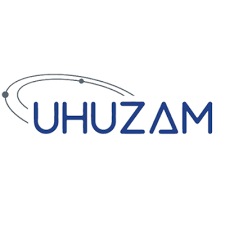

### Interactive Output 

In [1]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def first_order_(a, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, a * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(first_order_, a=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

# NDVI Calculation & Visualization 

* The normalized difference vegetation index (NDVI) is used to assess the state of vegetation. In living plants chlorophyll-A, from the photosynthetic machinery, strongly absorbs red color; on the other hand, near-infrared light is strongly reflected. Live, healthy vegetation reflects around 8% of red light and 50% of near-infrared light. Dead, unhealthy, or sparse vegetation reflects approximately 30% of red light and 40% of near-infrared light.

#### The NDVI is calculated as:

![1_NnHXc5y-oPeCe_DTmbXX6Q.png](attachment:1_NnHXc5y-oPeCe_DTmbXX6Q.png "NDVI")
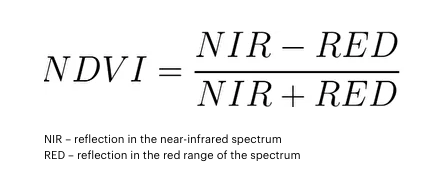

By its formulation, NDVI __ranges from -1 to +1__. In practice, an area of an image containing living vegetation will have NDVI in the range 0.3 to 0.8. _High water content_, _clouds_ and _snow_ will have negative values of the index. Bodies of water, having low reflectance in both Band 4 and 5, exhibit very low positive or negative index. _Soil_, having slightly higher reflectance in near-infrared than in red, will produce low positive values of the index.

Calculation of the NDVI is sensitive to to a few factors:

1. Atmospheric composition and appropriate modeling influence the calculation, especially if the correct water and aerosol content are initially incorrectly estimated.
2. Thin, hard to spot clouds like cirrus can significantly affect the calculation.
3. Sensor effects such as Sun angle not being calculated on per-pixel basis can influence the index estimation.

In [2]:
#!pip install watermark
%load_ext watermark
%watermark -v -m -p numpy,scikit-image,matplotlib


CPython 3.8.3
IPython 7.16.1

numpy 1.18.5
scikit-image not installed
matplotlib 3.3.1

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit


In [3]:
import re
import numpy as np
from skimage import io, exposure
import skimage.io
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline 
#JN needs this to render the graphics.

In [5]:
def _read_img(image_path):
    img = skimage.io.imread(image_path, plugin='tifffile')
    return img

def image_show(img, color_map, title):
    """
    Show image
    Input:
    img - 2D array of uint16 type
    color_map - string
    title - string
    """
    fig = plt.figure(figsize=(10, 10))
    fig.set_facecolor('white')
    plt.imshow(img, cmap=color_map)
    plt.title(title)
    plt.show()
    
def image_histogram(img):
    """
    Plot image histogram
    Input:
    img - 2D array of uint16 type
    """
    co, ce = exposure.histogram(img)
    
    fig = plt.figure(figsize=(10, 7))
    fig.set_facecolor('white')
    plt.plot(ce[1::], co[1::])
    plt.show()
    
def image_adjust_brightness(img, limit_left, limit_right, color_map, title):
    """
    Adjust image brightness and plot the image
    Input:
    img - 2D array of uint16 type
    limit_left - integer
    limit_right - integer
    color_map - string
    title - string
    """
    img_ha = exposure.rescale_intensity(img, (limit_left, limit_right))
    
    fig = plt.figure(figsize=(10, 10))
    fig.set_facecolor('cyan')
    plt.imshow(img_ha, cmap=color_map)
    plt.title(title)
    plt.colorbar()  
    plt.show()
    
    return img_ha

In [6]:
img_path = r"C:\Users\User2\Desktop\GEO\IMG_PHR1B_MS_202005150914449_ORT_PHR1B_20200812_0839301rzvdaz1zpwav_1_R1C1.TIF"

In [7]:
img = _read_img(img_path)

In [8]:
img.ndim

3

In [9]:
img.dtype

dtype('uint8')

In [10]:
img.min(), img.max()

(1, 255)

In [11]:
img.shape

(2561, 2561, 4)

In [12]:
red = img[:,:,0]
NIR = img[:,:,-1]

np_nir_as32 = NIR.astype(np.float32)
np_red_as32 = red.astype(np.float32)

In [13]:
ndvi = (np_nir_as32 - np_red_as32) / (np_nir_as32 + np_red_as32)

### Pleiades-1A 
- 2-meter multispectral

-Spectral Bands

1. P: 480-830 nm
2. Blue: 430-550 nm
3. Green: 490-610 nm
4. Red: 600-720 nm
5. Near Infrared: 750-950 nm

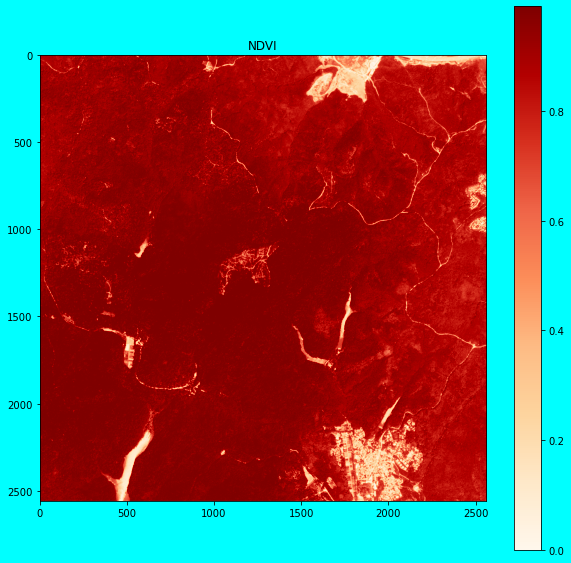

In [14]:
#%matplotlib notebook
#calling it a second time may prevent some graphics errors
#%matplotlib notebook  
#import matplotlib.pyplot as plt


img_ha = image_adjust_brightness(ndvi, 0, 1, 'OrRd', 'NDVI')

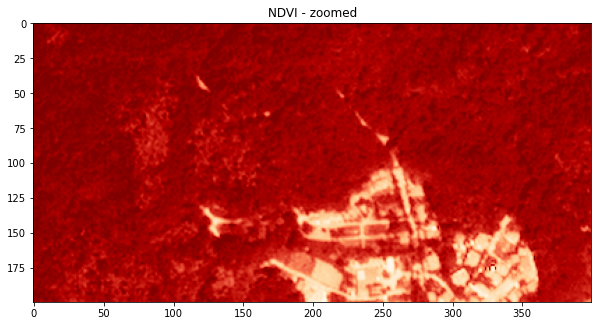

In [15]:
%matplotlib inline 

image_show(img_ha[2000:2200, 1500:1900], 'OrRd', 'NDVI - zoomed')


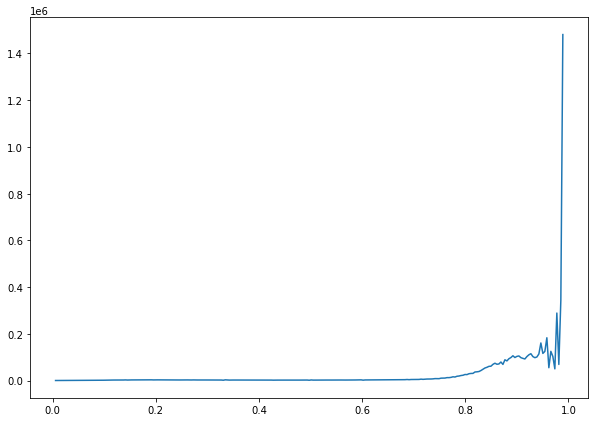

In [16]:
%matplotlib inline 

image_histogram(img_ha)

## Example-2

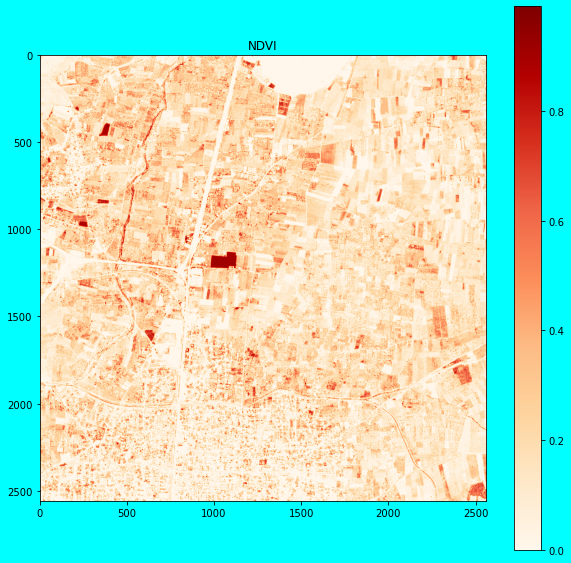

In [17]:
PHR_AKhisar_XS = r"C:\Users\PROCOMP11-PC\Desktop\GEO\akhisar_xs.tif"

A_xs_PHR_PMS_im = _read_img(PHR_AKhisar_XS)

A_xs_PMS_red = A_xs_PHR_PMS_im[:,:,0]
A_xs_PMS_NIR = A_xs_PHR_PMS_im[:,:,-1]

A_xs_PMS_np_nir_as32 = A_xs_PMS_NIR.astype(np.float32)
A_xs_PMS_np_red_as32 = A_xs_PMS_red.astype(np.float32)

A_xs_PMS_ndvi = (A_xs_PMS_np_nir_as32 - A_xs_PMS_np_red_as32) / (A_xs_PMS_np_nir_as32 + A_xs_PMS_np_red_as32)

%matplotlib inline 

A_xs_PMS_ndvi_enhanced = image_adjust_brightness(A_xs_PMS_ndvi, 0, 1, 'OrRd', 'NDVI')

#### Original Image

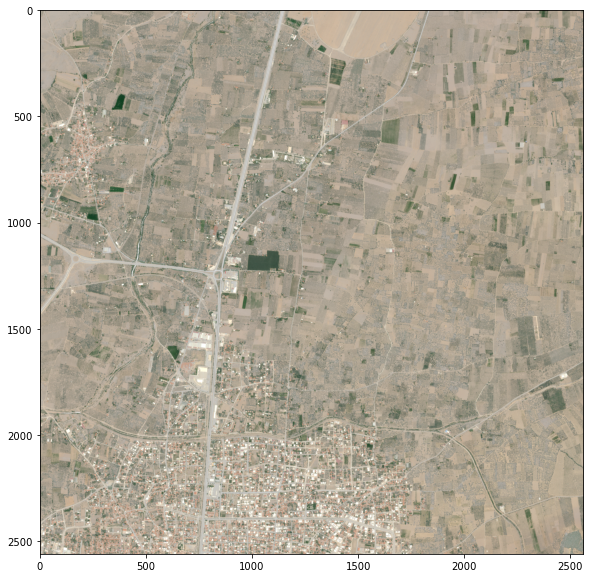

In [18]:
plt.figure(figsize=(10, 10))
plt.imshow(A_xs_PHR_PMS_im)

### Histogram

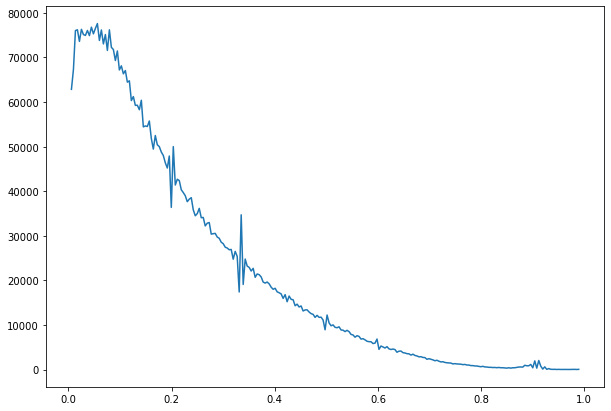

In [19]:
#%matplotlib inline 
image_histogram(A_xs_PMS_ndvi_enhanced)

<IPython.core.display.Javascript object>


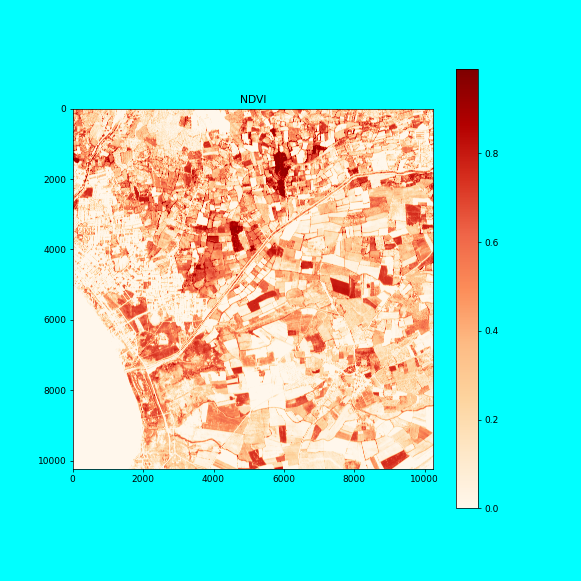

In [27]:
PHR_AKhisar_XS = r"C:\Users\PROCOMP11-PC\Desktop\GEO\akcay_psp\IMG_PHR1A_PMS_202006040911325_ORT_PHR1A_20200812_0830451evlrtr5ecfw8_1_R1C1.TIF"

A_xs_PHR_PMS_im = _read_img(PHR_AKhisar_XS)

A_xs_PMS_red = A_xs_PHR_PMS_im[:,:,0]
A_xs_PMS_NIR = A_xs_PHR_PMS_im[:,:,-1]

A_xs_PMS_np_nir_as32 = A_xs_PMS_NIR.astype(np.float32)
A_xs_PMS_np_red_as32 = A_xs_PMS_red.astype(np.float32)

A_xs_PMS_ndvi = (A_xs_PMS_np_nir_as32 - A_xs_PMS_np_red_as32) / (A_xs_PMS_np_nir_as32 + A_xs_PMS_np_red_as32)

%matplotlib notebook
#calling it a second time may prevent some graphics errors
%matplotlib notebook  
import matplotlib.pyplot as plt


_A_xs_PMS_ndvi_enhanced = image_adjust_brightness(A_xs_PMS_ndvi, 0, 1, 'OrRd', 'NDVI')

<IPython.core.display.Javascript object>


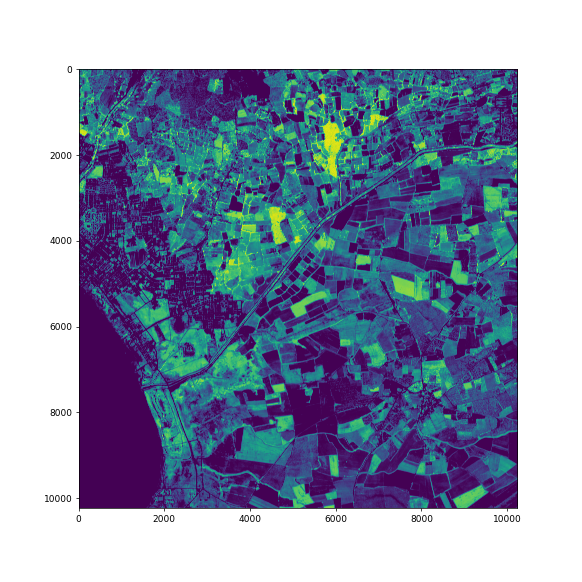

In [26]:
%matplotlib notebook
#calling it a second time may prevent some graphics errors
%matplotlib notebook  
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(_A_xs_PMS_ndvi_enhanced)

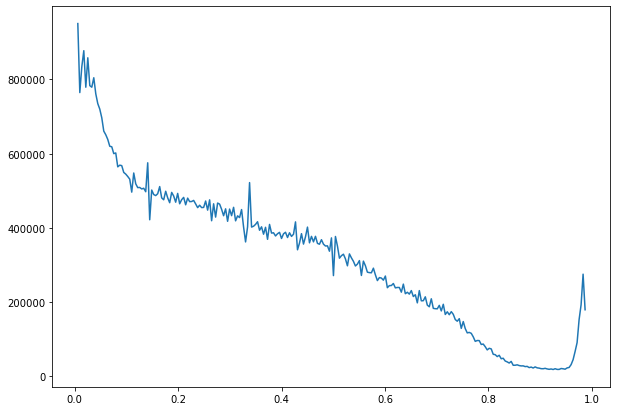

In [22]:
%matplotlib inline 
image_histogram(_A_xs_PMS_ndvi_enhanced)